# # 코드 진행 전 절차
  * (필요시) 가상환경 설정
  * tesseract 설치
    - https://github.com/UB-Mannheim/tesseract/wiki
  * 환경변수 PATH에 Tesseract 경로를 추가한다.
    - https://velog.io/@latte_h/Tesseract
  * 컴퓨터 재시작
  * 터미널에서 
    - pip install pytesseract, opencv-python, matplotlib

In [2]:
import pytesseract
import cv2

In [3]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

In [4]:
import matplotlib.pyplot as plt

In [32]:
img = cv2.imread('test.png')

In [33]:
img

array([[[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       ...,

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]]

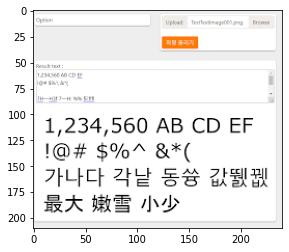

In [34]:
plt.imshow(img)

In [35]:
imgchar = pytesseract.image_to_string(img)

In [36]:
print(imgchar)

1,234,560 AB CD EF
1@# $%* &*(
PELECH ZPet Sas Zh ay

EK WE > -_



In [37]:
imgchar2 = pytesseract.image_to_string(img, lang='kor')
print(imgchar2)

1,234,560 48 0 ㅁ 타
1@# $9% 스 &*(
가 나다 각 날 동 승 값 앨 낄
릎 지 병 폭 1



In [38]:
imgchar3 = pytesseract.image_to_string(img, lang='chi_sim')
print(imgchar3)

1.234,560 AB CD EF
1@## $06^ &Ce(

LHC| 扬 昌 君 爹 砂 境 觊
最 大 嫩 雪 小 少



In [39]:
imgH, imgW, _ = img.shape

In [40]:
imgbox = pytesseract.image_to_boxes(img)
print(imgbox)

1 13 92 20 106 0
, 24 88 27 95 0
2 31 92 41 106 0
3 44 91 53 106 0
4 55 92 66 106 0
, 68 88 72 95 0
5 76 91 85 106 0
6 88 91 98 106 0
0 100 91 110 106 0
A 119 92 131 106 0
B 134 92 144 106 0
C 154 91 165 106 0
D 168 92 180 106 0
E 190 92 200 106 0
F 203 92 212 106 0
1 13 67 15 82 0
@ 19 65 35 82 0
# 39 67 51 81 0
$ 62 64 72 82 0
% 74 67 93 82 0
* 96 74 108 82 0
& 119 67 132 82 0
* 134 74 142 82 0
( 146 63 151 82 0
P 12 44 21 56 0
E 24 40 29 58 0
L 32 45 42 56 0
E 44 40 48 58 0
C 52 45 62 56 0
H 64 40 92 58 0
Z 80 40 91 58 0
P 90 48 95 58 0
e 99 40 112 57 0
t 110 48 114 58 0
S 124 40 141 57 0
a 141 40 152 57 0
s 144 40 161 57 0
Z 171 48 179 57 0
h 183 47 222 58 0
a 210 36 216 68 0
y 216 36 224 68 0
E 11 15 28 32 0
K 31 15 48 32 0
W 57 15 75 32 0
E 78 15 94 32 0
> 104 15 141 32 0
- 192 39 206 46 0
_ 211 39 226 46 0



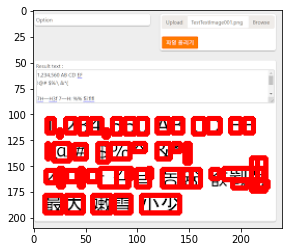

In [41]:
for boxes in imgbox.splitlines() :
    boxes = boxes.split(' ')
    x,y,w,h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])
    
    cv2.rectangle(img, (x, imgH - y), (w, imgH - h), (255, 0,0), 3)

plt.imshow(img)

# # video demo

In [15]:
import numpy as np

In [16]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

In [42]:
cap = cv2.VideoCapture('original_video.mp4')

if not cap.isOpened() :
    cap = VideoCapture(0)
    
if not cap.isOpened() :
    rasieIOError('Can not read video file...')

cntr = 0 
while True :
    _, frame = cap.read()
    cntr += 1
    
    if( (cntr%20) == 0 ) :
        
        imgH, imgW, _ = frame.shape
        x1, y1, w1, h1 = 0,0, imgH, imgW
        imgchar = pytesseract.image_to_string(frame)
        imgboxes = pytesseract.image_to_boxes(frame)
        
        for boxes in imgboxes.splitlines() :
            boxes = boxes.split(' ')
            x,y,w,h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])
            cv2.rectangle(frame, (x, imgH - y), (w, imgH - h), (255, 0,0), 3)

        cv2.putText(frame, imgchar, (x1+int(w1/10), y1+int(h1/10)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 3)

        font = cv2.FONT_HERSHEY_SIMPLEX

        cv2.imshow('Video dectection', frame)

        if cv2.waitKey(2) & 0xFF == ord('q') :
            break
                
cap.release()       
cv2.destroyAllWindows()

# # webcam

In [28]:
cap = cv2.VideoCapture(1)

if not cap.isOpened() :
    cap = VideoCapture(0)
    
if not cap.isOpened() :
    rasieIOError('Can not read video file...')

cntr = 0 
while True :
    _, frame = cap.read()
    cntr += 1
    
    if( (cntr%24) == 0 ) :
        
        imgH, imgW, _ = frame.shape
        x1, y1, w1, h1 = 0,0, imgH, imgW
        imgchar = pytesseract.image_to_string(frame)
        imgboxes = pytesseract.image_to_boxes(frame)
        
        for boxes in imgboxes.splitlines() :
            boxes = boxes.split(' ')
            x,y,w,h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])
            cv2.rectangle(frame, (x, imgH - y), (w, imgH - h), (255, 0,0), 3)

        cv2.putText(frame, imgchar, (x1+int(w1/10), y1+int(h1/10)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 3)

        font = cv2.FONT_HERSHEY_SIMPLEX

        cv2.imshow('Video dectection', frame)

        if cv2.waitKey(2) & 0xFF == ord('q') :
            break
                
cap.release()       
cv2.destroyAllWindows()